# Perceptron

In this notebook the Perceptron algorithm is implemented.
Currently, the training set is *separable*, ie, can be fit by a linear classifier with zero training error.
1. Run the notebook and press the Start button to see how Perceptron works.
2. Replace the point [0,2] below such that the training set is not separable any more. How does Perceptron behave now? Write a short answer


## Answer

Write your answer here:
After replace point (0,2) by (4,2), the dataset is not separable any more. We can find the yellow point is "covered" by the reds. During the iteration, it will continue infinite times for there is always one point cannot be calssfied right so that we cannot find a hyperplane to reach zero training error, t, i.e. iteration is not convergent any more.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import HTML,display,clear_output
import ipywidgets as widgets
%matplotlib inline
colormap='autumn'

## Generate dataset

We generate a simple separable dataset

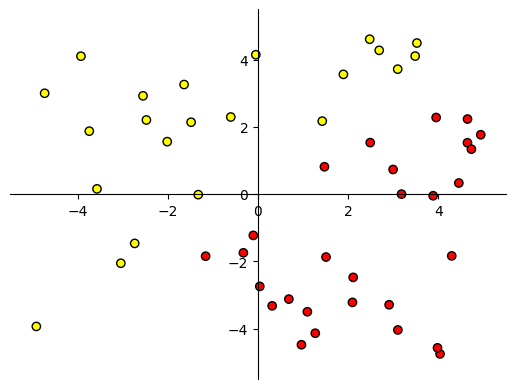

In [2]:
def generate_dataset(N,separation=0.5):
    X_list=[]
    y_list=[]
    w=np.array([-1,1])
    while len(X_list)<N:
        new_x=np.random.random(size=2)*10-5
        if abs(np.sum(w*new_x))>0.5:
            X_list.append(new_x)
            y_list.append((np.sum(w*new_x) > 0)*2-1)
    return np.array(X_list),np.array(y_list)

def plot_data(X_data,y_data):
    y_colors=(y_data+1)//2
    fig, ax = plt.subplots()

    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(-5.5,5.5)
    ax.set_ylim(-5.5,5.5)

    plt.scatter(X_data[:,0],X_data[:,1],c=y_colors,edgecolor='black',cmap=colormap)
    plt.show()

np.random.seed(12345)
X,y=generate_dataset(50,separation=0.5)
plot_data(X,y)



# <font color='red'>TODO:</font> Exchange [0,2] such that the training set is not separable

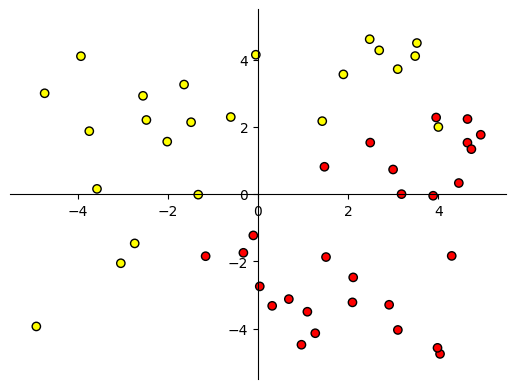

In [7]:
# Add a new point, currently the point [0,2] is added:
X_new=np.concatenate((X,[ [ 4,2 ] ]))

# Add the class of the new point, currently the class is 1:
y_new=np.append(y,1)

# Plot data to check if the new point appears:
plot_data(X_new,y_new)

## Perceptron

In [8]:
def perceptron(X,y,max_iteration=np.inf):
    i=0
    n=len(y)
    w=np.zeros(X.shape[1])
    record=[]  # for educational purposes we record w,x in each iteration
    iteration_count=0
    while iteration_count<max_iteration:
        k=0
        # we cycle through the datapoints until we find one that is misclassified
        # or until we looked at every datapoint (-> all correctly classified)
        while (y[i]*np.sum(X[i,:]*w)>0) and (k<n):
            i=(i+1)%n
            k=k+1
        if k==n:
            # all datapoints correctly classified -- we can stop now
            break
        else:
            # we've found a misclassified datapoint and use that to modify w
            w=w+y[i]*X[i,:]
            # to see what's happening we record w,the datapoint and its class
            record.append((w.copy(),X[i,:].copy(),y[i]))
        iteration_count+=1

    if iteration_count == max_iteration:
        print('Max_iterations exceeded: The Perceptron Algorithm could not find a solution within {} iterations.'.format(max_iteration))
    return w,record

def perceptron_predict(X,w):
    return np.sign(np.dot(X,w))

In [9]:
w,record=perceptron(X_new,y_new, max_iteration = 100)
print('Perceptron needed {} steps!'.format(len(record)))

# If you chose a point as required, a warning should appear!

Max_iterations exceeded: The Perceptron Algorithm could not find a solution within 100 iterations.
Perceptron needed 100 steps!


## Visualise perceptron steps

What is shown? The decision boundary of each step. Additionally the datapoint that let to the change in w is marked. (Sorry, I don't seem to get its colour to show correctly.)

Note: if you do not see the start button below then you need to install jupyter widgets, see https://ipywidgets.readthedocs.io/en/latest/user_install.html

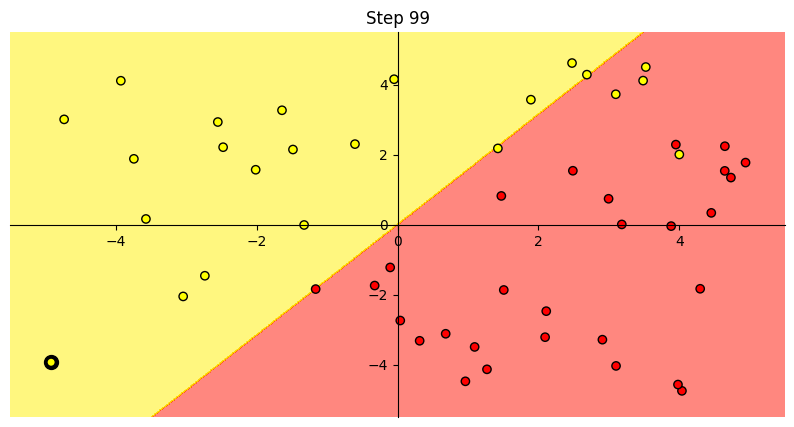

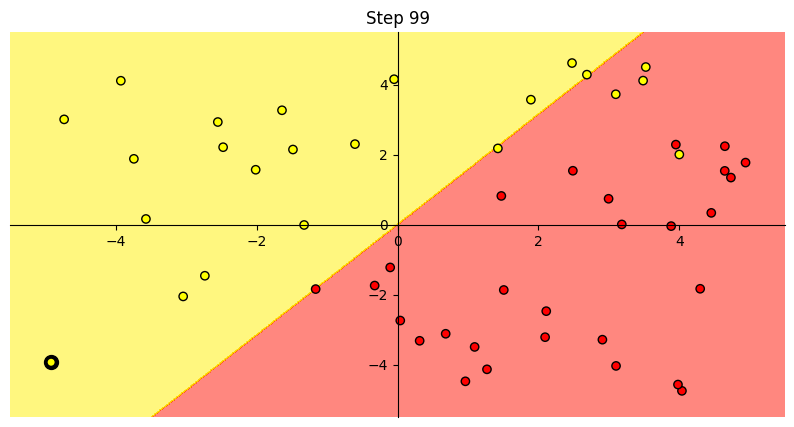

In [11]:
import threading
import time


resolution=500
L1=np.linspace(-5.5,5.5,num=resolution)
L2=np.linspace(-5.5,5.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)
XY=np.array([XX.flatten(),YY.flatten()]).T

start=widgets.Button(description="Start")
current_frame=0
max_num_frames=len(record)

def show_frame(i_point,i_weight):
    plt.clf()
    plt.close()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(-5.5,5.5)
    ax.set_ylim(-5.5,5.5)
    ax.set_title('Step {}'.format(i_point))
    _,x,yi=record[i_point]
    if i_weight >= 0:
        w,_,_=record[i_weight]
    else:
        w=[0,0]
    Z=perceptron_predict(XY,w)
    ax.contourf(XX,YY,Z.reshape(XX.shape),alpha=0.5,cmap=colormap) # draw classification boundary
    ax.scatter([x[0]],[x[1]],c=[3],s=100,edgecolor='black',cmap='gray')
    y_colors=(y_new+1)//2
    ax.scatter(X_new[:,0],X_new[:,1],c=y_colors,edgecolor='black',cmap=colormap)
    with out:
        clear_output(wait=True)
        display(ax.figure)



def on_click_start(b):
    for i in range(max_num_frames):
        show_frame(i,i-1)
        time.sleep(1)
        show_frame(i,i)
        time.sleep(1)


out=widgets.Output()
start.on_click(on_click_start)
hbox=widgets.HBox([start])
vbox=widgets.VBox(children=(out,hbox))

current_frame=0
display(vbox)

